In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('/content/flowerirs.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


describe a data that we choose to predict:

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

dataset processing

In [ ]:
# check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

data explotary analysis


<Axes: >

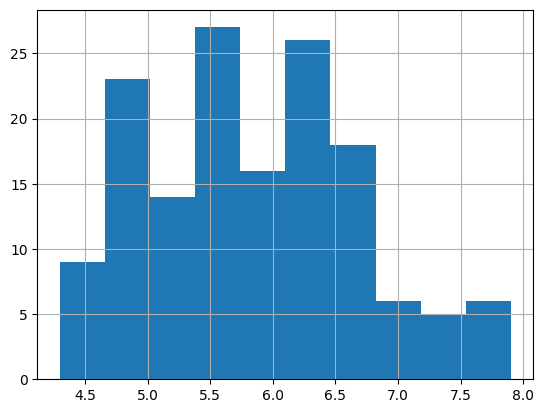

In [ ]:
df['sepal_length'].hist()

<Axes: >

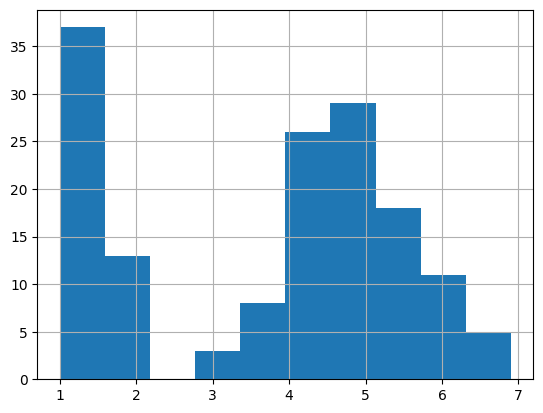

In [ ]:
df['petal_length'].hist()

scatterplot for each column
define different colurs to each column


In [ ]:
colors=['pink','navy blue', 'red',]
species=['Iris-virginica','Iris-versicolors','Iris-setosa']


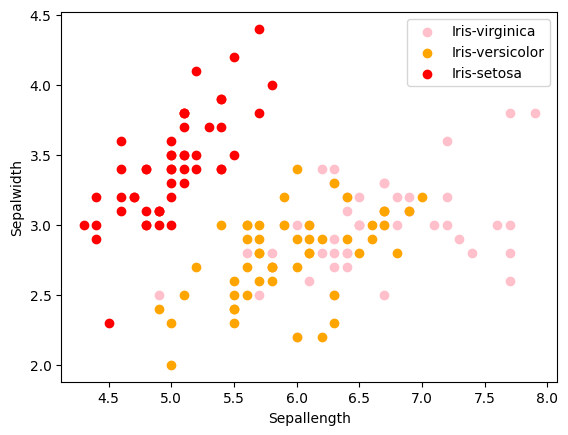

In [ ]:
species=['Iris-virginica','Iris-versicolor','Iris-setosa']
colors=['pink','orange', 'red',]
for i in range(3):
  x=df[df['species']== species[i] ]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i], label=species[i])
plt.xlabel('Sepallength')
plt.ylabel('Sepalwidth')
plt.legend()

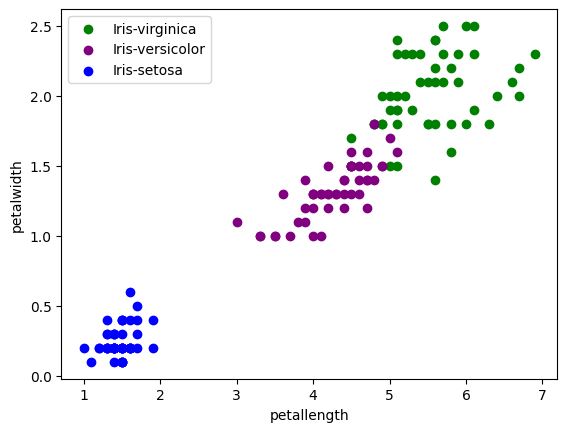

In [ ]:
species=['Iris-virginica','Iris-versicolor','Iris-setosa']
colors=['green','purple', 'blue',]
for i in range(3):
  x=df[df['species']== species[i] ]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i], label=species[i])
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.legend()

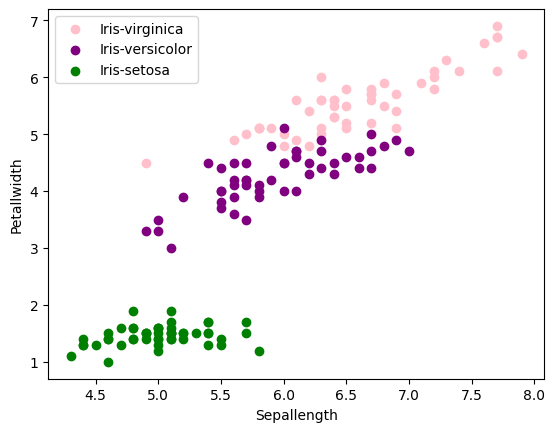

In [ ]:
species=['Iris-virginica','Iris-versicolor','Iris-setosa']
colors=['pink','purple', 'green',]
for i in range(3):
  x=df[df['species']== species[i] ]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i], label=species[i])
plt.xlabel('Sepallength')
plt.ylabel('Petallwidth')
plt.legend()

Correlation Matrix


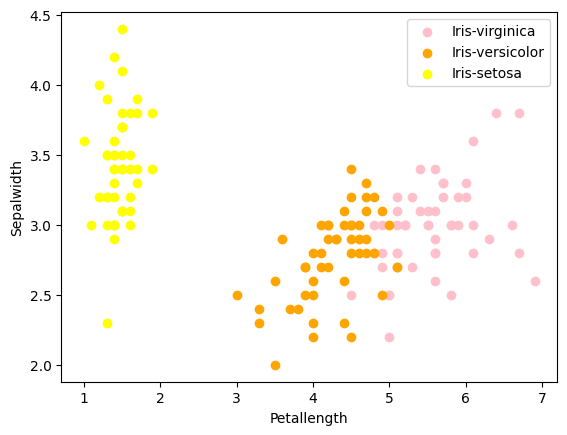

In [ ]:
species=['Iris-virginica','Iris-versicolor','Iris-setosa']
colors=['pink','orange', 'yellow',]
for i in range(3):
  x=df[df['species']== species[i] ]
  plt.scatter(x['petal_length'],x['sepal_width'],c=colors[i], label=species[i])
plt.xlabel('Petallength')
plt.ylabel('Sepalwidth')
plt.legend()

Correlation matrix

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,NaN
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,NaN
petal_length,0.871754,-0.420516,1.000000,0.962757,NaN
petal_width,0.817954,-0.356544,0.962757,1.000000,NaN
species,NaN,NaN,NaN,NaN,NaN


<Axes: >

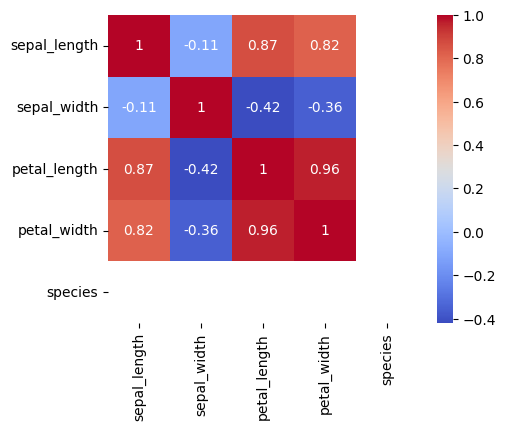

In [ ]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')


label encoder



In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:

from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
Y=df['species']
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()


In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("accuracy:", model.score(x_test, y_test)*100)

accuracy: 95.55555555555556


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [ ]:
print("accuracy:", model.score(x_train, y_train)*100)

accuracy: 98.09523809523809


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
print("accuracy:", model.score(x_test, y_test)*100)

accuracy: 95.55555555555556


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("accuracy:", model.score(x_train, y_train)*100)

accuracy: 100.0
